In [1]:
#데이터 다운 링크 : https://dacon.io/competitions/official/235680/data
#링크에서 데이터를 다운받아 ipynb를 넣어서 실행시켜 주면 된다.
#데이터 불러오기
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [2]:
df_train = pd.read_csv(r".\train\train.csv", header = 'infer', encoding = 'utf-8')

## 데이터 확인하기

In [3]:
df_train.head(10)

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,1.5,69.08,-12,0.0
1,0,0,30,0,0,1.5,69.06,-12,0.0
2,0,1,0,0,0,1.6,71.78,-12,0.0
3,0,1,30,0,0,1.6,71.75,-12,0.0
4,0,2,0,0,0,1.6,75.20,-12,0.0
5,0,2,30,0,0,1.5,69.29,-11,0.0
6,0,3,0,0,0,1.5,72.56,-11,0.0
7,0,3,30,0,0,1.4,72.55,-11,0.0
8,0,4,0,0,0,1.3,74.62,-11,0.0
9,0,4,30,0,0,1.3,74.61,-11,0.0


## 변수 확인하기.

In [4]:
print(df_train.columns)
#DHI : 수평면 산란일사량(Diffuse Horizontal Irradiance (W/m2))
#DNI :  직달일사량(Direct Normal Irradiance (W/m2)
#WS : 풍속(Wind Speed (m/s))
#RH : 상대습도(Relative Humidity (%))
#T : 기온(Temperature (Degree C))
#TARGET : 태양광 발전량 (kW)

Index(['Day', 'Hour', 'Minute', 'DHI', 'DNI', 'WS', 'RH', 'T', 'TARGET'], dtype='object')


## 고유값 확인하기.

In [5]:
df_train.apply(lambda x: x.nunique())

Day        1095
Hour         24
Minute        2
DHI         525
DNI        1056
WS          115
RH         8691
T            55
TARGET    16931
dtype: int64

## 결측치확인

In [6]:
df_train.isna().sum()

Day       0
Hour      0
Minute    0
DHI       0
DNI       0
WS        0
RH        0
T         0
TARGET    0
dtype: int64

# 필요없는 데이터 제외하기.

In [7]:
#필요없는 데이터 제외하기.
train = df_train[['Hour', 'DHI', 'DNI', 'WS', 'RH', 'T', 'TARGET']]

## 각 변수에 따른 TARGET의 변화를 그래프로 나타내기

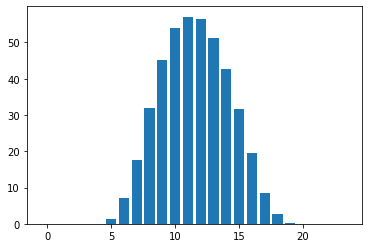

In [8]:

#시간별 태양광발전량 평균.
target_mean = train.groupby('Hour').TARGET.mean()

plt.bar(target_mean.index , target_mean)
plt.show()

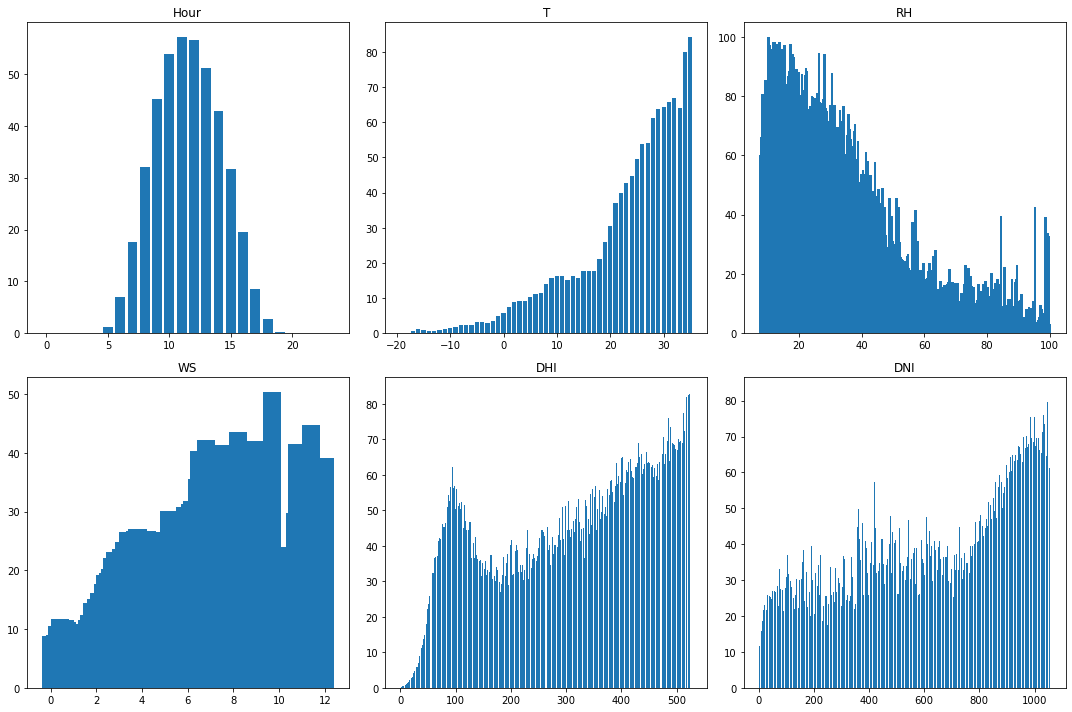

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

target_me = train.groupby('Hour').TARGET.mean()
axes[0,0].bar(target_me.index, target_me)
axes[0,0].set_title('Hour')

target_me = train.groupby('T').TARGET.mean()
axes[0,1].bar(target_me.index, target_me)
axes[0,1].set_title('T')

target_me = train.groupby('RH').TARGET.mean()
axes[0,2].bar(target_me.index, target_me)
axes[0,2].set_title('RH')

target_me = train.groupby('WS').TARGET.mean()
axes[1,0].bar(target_me.index, target_me)
axes[1,0].set_title('WS')

target_me = train.groupby('DHI').TARGET.mean()
axes[1,1].bar(target_me.index, target_me)
axes[1,1].set_title('DHI')

target_me = train.groupby('DNI').TARGET.mean()
axes[1,2].bar(target_me.index, target_me)
axes[1,2].set_title('DNI')


fig.tight_layout()

- 낮일수록 전력량은 늘어난다.
- 온도가 높아질수록 전력량은 늘어난다.
- 습기가 낮을수록 전력량은 늘어난다.
- 풍속이 빠를수록 대체로 전력량이 높다.
- DHI가 높을수록 전력량이 높다.
- DNI가 높을수록 전력량이 높다.

# 기온에 따른 DNI와 DHI.

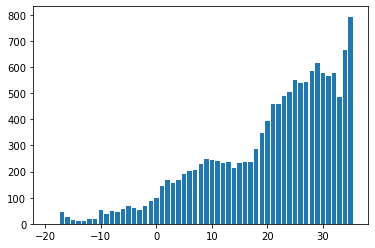

In [10]:
#기온에 따른 DNI
target_mean = train.groupby('T').DNI.mean()

plt.bar(target_mean.index , target_mean)
plt.show()

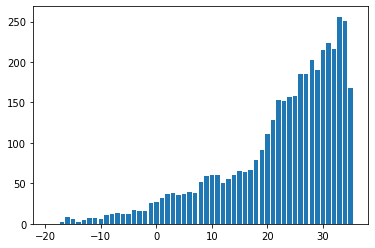

In [11]:
#기온에 따른 DHI
target_mean = train.groupby('T').DHI.mean()

plt.bar(target_mean.index , target_mean)
plt.show()

## 변수간 상관계수 확인하기.

<AxesSubplot:title={'center':'TARGET Correlation of Features'}>

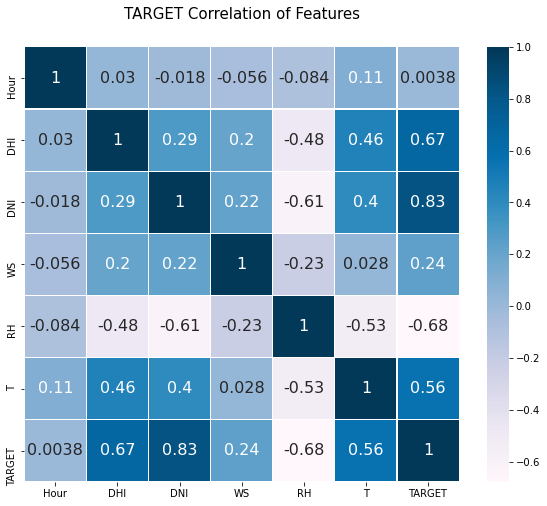

In [12]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("TARGET Correlation of Features", y = 1.05, size = 15)
sns.heatmap(train.astype(float).corr(), linewidth=0.1, vmax = 1.0, square= True, cmap = colormap, linecolor = 'white', annot = True, annot_kws = {"size" : 16})

# 데이터 분배.

In [13]:
train_input = train[['Hour','DHI', 'DNI', 'RH', 'WS', 'T']]
train_target = train[['TARGET']]

## histogram-based gradient boosting

In [14]:
#그래디언트 부스팅(histogram-based gradient boosting)
#cross_validate를 사용해 교차검증을 수행한다.
#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.model_selection import cross_validate

#gb = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.2, random_state=42)
#sc = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
#print(np.mean(sc['train_score']), np.mean(sc['test_score']))

In [15]:
#히스토그램 기반 그래디언트 부스팅(histogram-based gradient boosting)
#cross_validate를 사용해 교차검증을 수행한다.
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_validate
gb = HistGradientBoostingRegressor( learning_rate=0.2, random_state=42) #learning_rate : 학습률.

#교차검증 수행
sc = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(sc['train_score']), np.mean(sc['test_score']))

0.998685286497647 0.9967027791813203


In [16]:
gb.fit(train_input,train_target)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


HistGradientBoostingRegressor(learning_rate=0.2, random_state=42)

In [17]:
gb.score(train_input, train_target)

0.9986001331077233

In [18]:
#예측해보기.
gb.predict([[9,58,743,2.1,57.39,-6]])

array([22.3544293])

## test csv 합치기.
- test 데이터가 여러개의 csv로 나누어져 있기 때문에 한개로 합쳐주는 과정이 필요함.

In [19]:
import pandas as pd
import glob
import os

file_loc = r'.\test' # csv파일들이 있는 디렉토리 위치
all_file = r'test_sum.csv' # 병합하여 저장하려는 파일명

In [20]:
allFile_list = glob.glob(os.path.join(file_loc, '*csv')) # glob함수를 통해 *csv로 끝나는 파일들을 모아준다.
print(allFile_list)

['.\\test\\0.csv', '.\\test\\1.csv', '.\\test\\10.csv', '.\\test\\11.csv', '.\\test\\12.csv', '.\\test\\13.csv', '.\\test\\14.csv', '.\\test\\15.csv', '.\\test\\16.csv', '.\\test\\17.csv', '.\\test\\18.csv', '.\\test\\19.csv', '.\\test\\2.csv', '.\\test\\20.csv', '.\\test\\21.csv', '.\\test\\22.csv', '.\\test\\23.csv', '.\\test\\24.csv', '.\\test\\25.csv', '.\\test\\26.csv', '.\\test\\27.csv', '.\\test\\28.csv', '.\\test\\29.csv', '.\\test\\3.csv', '.\\test\\30.csv', '.\\test\\31.csv', '.\\test\\32.csv', '.\\test\\33.csv', '.\\test\\34.csv', '.\\test\\35.csv', '.\\test\\36.csv', '.\\test\\37.csv', '.\\test\\38.csv', '.\\test\\39.csv', '.\\test\\4.csv', '.\\test\\40.csv', '.\\test\\41.csv', '.\\test\\42.csv', '.\\test\\43.csv', '.\\test\\44.csv', '.\\test\\45.csv', '.\\test\\46.csv', '.\\test\\47.csv', '.\\test\\48.csv', '.\\test\\49.csv', '.\\test\\5.csv', '.\\test\\50.csv', '.\\test\\51.csv', '.\\test\\52.csv', '.\\test\\53.csv', '.\\test\\54.csv', '.\\test\\55.csv', '.\\test\\56.csv'

In [21]:
allData = [] #빈 리스트 한개 생성.
for file in allFile_list:
    df = pd.read_csv(file) # for구문으로 csv파일들을 읽어 들인다
    allData.append(df) # 빈 리스트에 읽어 들인 내용을 추가한다

In [22]:
#axis=0은 수직병합. axis=1은 수평병합. ignore_index=True는 인덱스 값이 기존 순서를 무시하고 순서대로 정렬.
data_Combine = pd.concat(allData, axis=0, ignore_index=True) # concat함수를 이용해서 리스트의 내용을 병합


In [23]:
#병합된 데이터 보기.
data_Combine

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,2.7,34.42,0.0,0.0
1,0,0,30,0,0,2.7,34.17,0.1,0.0
2,0,1,0,0,0,2.7,34.23,0.2,0.0
3,0,1,30,0,0,2.7,33.99,0.3,0.0
4,0,2,0,0,0,2.8,33.97,0.4,0.0
...,...,...,...,...,...,...,...,...,...
27211,6,21,30,0,0,2.7,55.31,14.9,0.0
27212,6,22,0,0,0,3.0,55.48,14.5,0.0
27213,6,22,30,0,0,3.1,56.20,14.3,0.0
27214,6,23,0,0,0,3.2,54.87,14.0,0.0


In [24]:
#테스트 해보기.
test_input = data_Combine[['Hour', 'DHI', 'DNI','RH', 'WS', 'T']]
test_target = data_Combine[['TARGET']]

In [25]:
gb.score(test_input,test_target)

0.994600099718271

## 테스트데이터의  TARGET을 예측하고, csv파일의 새로운 열에 추가하기.

In [26]:
#변수에 예측된 test의 TARGET 데이터 입력.
test_predict = gb.predict(test_input)

In [27]:
#TARGET_predict열 추가.
data_Combine['TARGET_predict'] = test_predict

In [28]:
# TARGET 예측이 0.01보다 작다면 0으로 판단. 
for i in range(0,len(data_Combine['TARGET_predict'])):
    if (data_Combine['TARGET_predict'][i] < 0.01):
        data_Combine['TARGET_predict'][i] = 0

<ipython-input-28-2c8b5e37cd7a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Combine['TARGET_predict'][i] = 0


In [29]:
data_Combine.to_csv(all_file, index=False)

In [30]:
#변형후 score를 측정해 보기.
test_input = data_Combine[['Hour', 'DHI', 'DNI','RH', 'WS', 'T']]
test_target = data_Combine[['TARGET_predict']]
gb.score(test_input, test_target)

0.9999999702427209